MNIST 손글씨 인식하기(기본 프레임)

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.datasets import mnist
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

In [19]:
# mnist 데이터셋을 불러와 학습셋과 테스트셋으로 저장
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 차원변환 후, 테스트셋과 학습셋으로 분리
X_train = X_train.reshape(X_train.shape[0], 784).astype('float64') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [20]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

#모델 최적화 설정
modelpath = './MNIST_MLP.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.18114, saving model to ./MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.18114 to 0.12970, saving model to ./MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.12970 to 0.10942, saving model to ./MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.10942 to 0.09708, saving model to ./MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.09708 to 0.09159, saving model to ./MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09159 to 0.08874, saving model to ./MNIST_MLP.hdf5

Epoch 7: val_loss improved from 0.08874 to 0.08339, saving model to ./MNIST_MLP.hdf5

Epoch 8: val_loss did not improve from 0.08339

Epoch 9: val_loss did not improve from 0.08339

Epoch 10: val_loss improved from 0.08339 to 0.08314, saving model to ./MNIST_MLP.hdf5

Epoch 11: val_loss improved from 0.08314 to 0.07995, saving model to ./MNIST_MLP.hdf5

Epoch 12: val_loss did not improve from 0.07995

Epoch 13: val_loss did not improve from 0.07995

Epoch 14: val_loss did not improv

In [22]:
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0704 - accuracy: 0.9825

 Test Accuracy: 0.9825


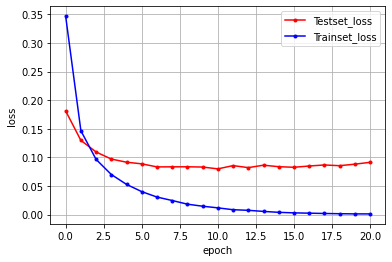

In [23]:
# 검증과 학습셋의 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Trainset_loss")

# 그리드와 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()